In [24]:
import pandas as pd
#from fbprophet import Prophet

In [39]:
data = pd.read_csv("restaurant-1-orders.csv")
data.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [40]:
#slect only needed columns
data_port = data[["Order Date", "Item Name", "Quantity", "Total products"]]

# drop NaN-Cases
data_port = data_port.dropna()
data_port

,Order Date,Item Name,Quantity,Total products
0,03/08/2019 20:25,Plain Papadum,2,6
1,03/08/2019 20:25,King Prawn Balti,1,6
2,03/08/2019 20:25,Garlic Naan,1,6
3,03/08/2019 20:25,Mushroom Rice,1,6
4,03/08/2019 20:25,Paneer Tikka Masala,1,6
...,...,...,...,...
74813,18/05/2016 18:53,House Red wine 75cl,2,7
74814,14/05/2016 19:28,House Red wine 75cl,2,6
74815,10/05/2016 13:18,House Red wine 75cl,2,9
74816,07/04/2016 19:04,House white wine 75cl,1,6


In [41]:
#change to datetime
data_port["Order Date"] = pd.to_datetime(data_port["Order Date"])
data_port["Order Date"] = pd.to_datetime(data_port["Order Date"], format='%Y%m%d')
#data_port = data_port.set_index('Order Date')

data_port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      74818 non-null  datetime64[ns]
 1   Item Name       74818 non-null  object        
 2   Quantity        74818 non-null  int64         
 3   Total products  74818 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.9+ MB


In [42]:
data_ts = data_port
data_ts.head()

,Order Date,Item Name,Quantity,Total products
0,2019-03-08 20:25:00,Plain Papadum,2,6
1,2019-03-08 20:25:00,King Prawn Balti,1,6
2,2019-03-08 20:25:00,Garlic Naan,1,6
3,2019-03-08 20:25:00,Mushroom Rice,1,6
4,2019-03-08 20:25:00,Paneer Tikka Masala,1,6


In [43]:
products = data_ts['Item Name'].unique()
len(products)

248

In [44]:
data_grouped = data_ts.groupby(['Item Name'])['Total products', 'Quantity'].sum()
data_grouped.tail(100)

c:\Users\muste\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total products,Quantity
Item Name,,
Methi - Chicken,144,17
Methi - Chicken Tikka,89,5
Methi - King Prawn,66,2
Methi - Lamb,141,15
Methi - Prawn,62,2
...,...,...
Vindaloo - Chicken Tikka,146,17
Vindaloo - King Prawn,192,23
Vindaloo - Lamb,353,55


In [50]:
df = data_grouped.iloc[0]
df

Total products    1808
Quantity           316
Name: Aloo Chaat, dtype: int64

In [36]:
top_ten = data_grouped.sort_values(by = 'Total products', ascending=False).head(10)
top_ten

,Total products
Item Name,
Pilau Rice,31314
Plain Papadum,27140
Plain Naan,24276
Onion Bhajee,17293
Garlic Naan,17143
Mango Chutney,16991
Plain Rice,15345
Chicken Tikka Masala,14439
Mint Sauce,12615


In [51]:
top_ten_list = top_ten.index.tolist()

['Pilau Rice',
 'Plain Papadum',
 'Plain Naan',
 'Onion Bhajee',
 'Garlic Naan',
 'Mango Chutney',
 'Plain Rice',
 'Chicken Tikka Masala',
 'Mint Sauce',
 'Bombay Aloo']

In [ ]:
for index, row in data_port.iterrows():


In [7]:
#ts = data_port.groupby("Order Date")["Total products"]
#ts.head()

In [21]:
data_grouped = data_ts.groupby(['Item Name', 'Order Date']).sum('Total products')
data_grouped.tail(100)

Total products
Item Name        Order Date                         
Vindaloo - Lamb  2019-12-03 19:57:00               5
Vindaloo - Prawn 2018-05-05 12:56:00              60
                 2018-10-16 19:05:00               5
                 2018-10-25 17:43:00              12
                 2019-02-14 20:31:00               7
...                                              ...
Vindaloo Sauce   2019-07-30 21:05:00               4
                 2019-08-06 18:20:00               5
                 2019-09-06 18:29:00               5
                 2019-10-05 18:59:00               4
                 2019-11-06 18:21:00               5

[100 rows x 1 columns]

In [22]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74441 entries, ('Aloo Chaat', Timestamp('2016-02-08 22:09:00')) to ('Vindaloo Sauce', Timestamp('2019-11-06 18:21:00'))
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Total products  74441 non-null  int64
dtypes: int64(1)
memory usage: 976.6+ KB


In [20]:
data_grouped[].unique()

KeyError: 'Item Name'

In [24]:
data_ts.rename(columns= {'Order Date':'ds', 'Total products':'y'}, inplace = True)

c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
data_ts.head()

,ds,y
0,2019-03-08 20:25:00,6
1,2019-03-08 20:25:00,6
2,2019-03-08 20:25:00,6
3,2019-03-08 20:25:00,6
4,2019-03-08 20:25:00,6


In [26]:
m = Prophet()
m.fit(data_ts)

In [27]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
13441,2020-12-02 22:24:00
13442,2020-12-03 22:24:00
13443,2020-12-04 22:24:00
13444,2020-12-05 22:24:00
13445,2020-12-06 22:24:00


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
13441,2020-12-02 22:24:00,5.240795,-3.120839,13.123272
13442,2020-12-03 22:24:00,5.096716,-3.477346,13.481410
13443,2020-12-04 22:24:00,6.095699,-2.499805,13.823285
13444,2020-12-05 22:24:00,6.198232,-2.134341,14.402703
13445,2020-12-06 22:24:00,5.414730,-2.466718,13.648517


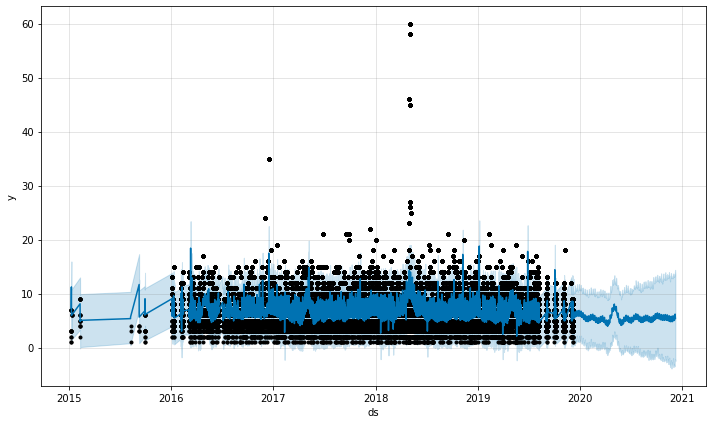

In [29]:
fig1 = m.plot(forecast)

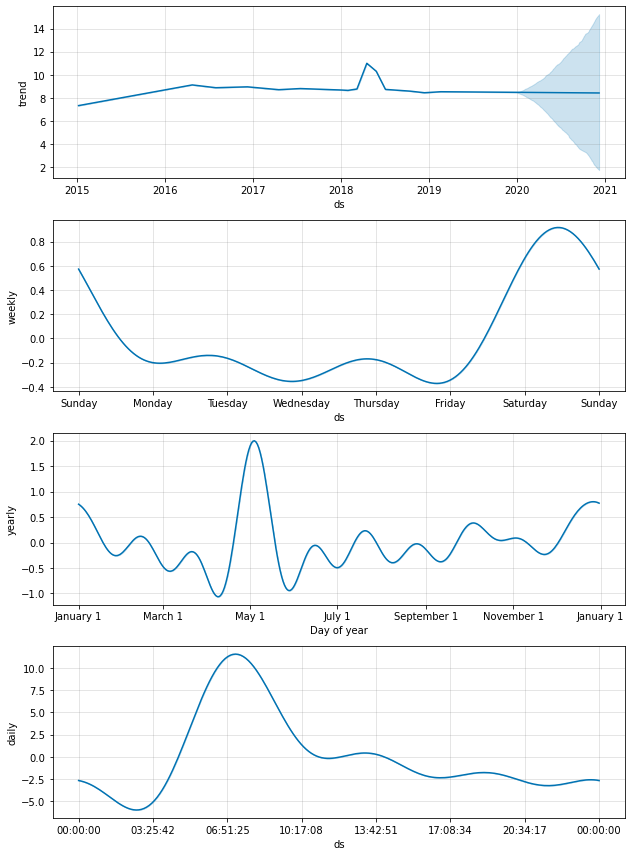

In [30]:
fig2 = m.plot_components(forecast)


## Predict one week

In [35]:
future_week = m.make_future_dataframe(periods=7)
future_week.tail(7)

,ds
13081,2019-12-08 22:24:00
13082,2019-12-09 22:24:00
13083,2019-12-10 22:24:00
13084,2019-12-11 22:24:00
13085,2019-12-12 22:24:00
13086,2019-12-13 22:24:00
13087,2019-12-14 22:24:00


In [36]:
forecast_week = m.predict(future_week)

,ds,yhat,yhat_lower,yhat_upper
13083,2019-12-10 22:24:00,5.470320,0.511416,10.275422
13084,2019-12-11 22:24:00,5.700041,0.955866,10.606046
13085,2019-12-12 22:24:00,5.553552,0.732889,10.416819
13086,2019-12-13 22:24:00,6.546179,1.764300,11.233845
13087,2019-12-14 22:24:00,6.638751,1.592763,11.482602


In [37]:
forecast_week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
13081,2019-12-08 22:24:00,5.536651,0.543398,10.428316
13082,2019-12-09 22:24:00,5.623116,0.973259,10.555108
13083,2019-12-10 22:24:00,5.470320,0.511416,10.275422
13084,2019-12-11 22:24:00,5.700041,0.955866,10.606046
13085,2019-12-12 22:24:00,5.553552,0.732889,10.416819
13086,2019-12-13 22:24:00,6.546179,1.764300,11.233845
13087,2019-12-14 22:24:00,6.638751,1.592763,11.482602


In [40]:
#fig1 = m.plot(forecast_week)

In [43]:
tail = forecast_week['yhat'].tail(7)
vorhersage = forecast_week['yhat'].tolist()
vorhersage

[7.285471668722211,
 11.23605856752107,
 10.780675005836297,
 8.9495902619048,
 7.138916793467985,
 6.263694406862973,
 6.2507432522406745,
 5.956408005853745,
 8.113671352770389,
 7.213830771102398,
 6.589936552141842,
 4.8403974753568395,
 5.0455610164030205,
 5.365057464990859,
 5.485463857321316,
 5.661274554299272,
 11.685441272421581,
 7.474412037061662,
 7.47568212697875,
 8.017729610404201,
 7.003200809141401,
 5.65713230649998,
 6.795921109035788,
 6.501912029841094,
 6.022258639385267,
 9.04221300100723,
 6.642953834889182,
 6.465141084867352,
 6.14249992124892,
 9.041315310664618,
 9.127943029480766,
 7.464781528779705,
 7.456849093388819,
 7.1924154559024895,
 6.9110791257828055,
 6.885226293166525,
 6.580870799838653,
 6.099774224101283,
 6.026723923946767,
 7.211711900957207,
 5.770571839528265,
 6.78599294463895,
 6.803957174678442,
 6.866701947100859,
 7.112490266099664,
 6.046106596457532,
 8.083495504468619,
 8.068286570980153,
 6.811824001822291,
 9.584986699654422,


In [44]:
tail = forecast_week['yhat'].tail(7)
vorhersage = tail.tolist()
vorhersage

[5.536651398428474,
 5.623116193617774,
 5.470319584577764,
 5.700040519872582,
 5.553552219772976,
 6.546179383098091,
 6.638751458651194]

## Quellen

https://facebook.github.io/prophet/docs/quick_start.html



https://www.youtube.com/watch?v=KvLG1uTC-KU
